# Librerías y funciones a utilizar

In [121]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Map dependencies
from __future__ import print_function
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

def gen_plot_map(states_values_dict, title = ''):
    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    # draw state boundaries.
    # data from U.S Census Bureau
    # http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
    # population density by state from
    # http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

    # print(shp_info)
    # choose a color for each state based on population density.
    colors={}
    statenames=[]
    cmap = plt.cm.hot # use 'hot' colormap
    vmin = min(states_values_dict.values())
    vmax = max(states_values_dict.values())
    # vmin = 0;
    # vmax = 450 # set range.
    # print(m.states_info[0].keys())
    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = states_values_dict[statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)

    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)

    ax.set_title(title)

    plt.plot()

# DESAFIO 1

In [122]:
#Link al blog: https://docs.google.com/document/d/1E3zinOhDEfd_zA7nMLFTdg24lxeZCnRtb5pz9uBU_60/edit?usp=sharing

## Paso 1. Abrir el dataset SATscore2015.csv. Investigar la estructura de los datos y responder

### 1. ¿Qué es lo que describen los datos?

In [123]:
#Describen los promedios de los puntajes SAT de matemática, escritura y totales para los alumnos de los distintos estados de EEUU


### 2. ¿Se ve algún problema en los datos? ¿Están completos?

In [124]:
#La columna de Mathematics por alguna razón detecta que es de tipo "objeto" (tiene un valor no integer en la fila 47)

### 3. ¿Qué representan las filas? ¿Y las columnas?

In [125]:
#Las filas son los diferentes estados y las columnas son los respectivos puntajes para cada estado en cada categoría

### 4. Creá un diccionario de datos para el dataset en formato texto. En el mismo deben describirse las diferentes variables, su nivel de medición y dar alguna(s) medida(s) descriptiva(s) de cada una.

In [126]:
diccionarioSAT = {"State":"Contiene el nombre del estado.", 
                  "Mathematics":"Score promedio para ese estado en el examen de matemática."
                  ,"Writing":"Score promedio para ese estado en el examen de escritura."
                  , "Total SAT score": "Suma de los Scores obtenidos en los examenes de Math, Writing y Reading."}
diccionarioSAT

{'Mathematics': 'Score promedio para ese estado en el examen de matemática.',
 'State': 'Contiene el nombre del estado.',
 'Total SAT score': 'Suma de los Scores obtenidos en los examenes de Math, Writing y Reading.',
 'Writing': 'Score promedio para ese estado en el examen de escritura.'}

## Paso 2. Cargar el dataset

### 5. Cargá los datos en una lista de listas

In [171]:

#Usamos pandas para cargar los datos en un dataset en vez de lista de listas
satScore = pd.read_csv('SATscore2015.csv')
satScore.head()

,State,Mathematics,Writing,Total SAT score
0,Alabama,538,533,1616
1,Alaska,503,482,1494
2,Arizona,527,502,1552
3,Arkansas,569,551,1688
4,California,506,491,1492


In [172]:
satScore

,State,Mathematics,Writing,Total SAT score
0,Alabama,538,533,1616
1,Alaska,503,482,1494
2,Arizona,527,502,1552
3,Arkansas,569,551,1688
4,California,506,491,1492
5,Colorado,587,567,1736
6,Connecticut,506,504,1514
7,Delaware,461,445,1368
8,District of Columbia,440,432,1313
9,Florida,480,468,1434


### 6. Visualizá (print) los datos

In [173]:
satScore.head()

,State,Mathematics,Writing,Total SAT score
0,Alabama,538,533,1616
1,Alaska,503,482,1494
2,Arizona,527,502,1552
3,Arkansas,569,551,1688
4,California,506,491,1492


### 7. Extraé una lista de las etiquetas de los datos y removela del dataset

In [176]:
list(satScore.columns)
#Si la removemos la tenemos que volver a poner después
#Se podría cargar sin header así:
#satScore_sin_header = pd.read_csv('SATscore2015.csv', header=None)

['State', 'Mathematics', 'Writing', 'Total SAT score']

### 8. Creá una lista con los nombres de los Estados del dataset. (Pista: usá la lista de etiquetas como índice)

In [177]:
satScore['State'].values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Virgin Islands', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### 9. Imprimí los tipos de cada columna

In [178]:
satScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
State              53 non-null object
Mathematics        53 non-null int64
Writing            53 non-null int64
Total SAT score    53 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


### 10. ¿Hay algún tipo que deba ser cambiado? Si es así, transformalo al tipo que corresponde

In [179]:
# Math tiene tipo object, tiene que ser de tipo numerico.
# primero hay que cambiar el valor no numerico por un numerico
math = satScore['Mathematics'].replace('.', np.nan).astype(np.float)
math = math.fillna(math.mean())
math = math.astype(np.int)
satScore['Mathematics'] = math
print(math.head())
satScore.dtypes

0    538
1    503
2    527
3    569
4    506
Name: Mathematics, dtype: int64


State              object
Mathematics         int64
Writing             int64
Total SAT score     int64
dtype: object

### 11. Creá un diccionario para cada columna vinculando cada Estado con su respectivo valor en esa columna

In [180]:
states = satScore['State'].values
mathScore = satScore['Mathematics'].values
writingScore = satScore['Writing'].values
totalScore = satScore['Total SAT score'].values

diccionarioMath = {k:x for k,x in zip(states,mathScore)}
diccionarioWriting = {k:x for k,x in zip(states,writingScore)}
diccionarioTotal = {k:x for k,x in zip(states, totalScore)}

### 12. Creá un diccionario para cada una de las columnas numéricas

In [181]:
#Idem anterior

## Paso 3. Describir los datos

### Mapa de Total SAT scores por estado

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


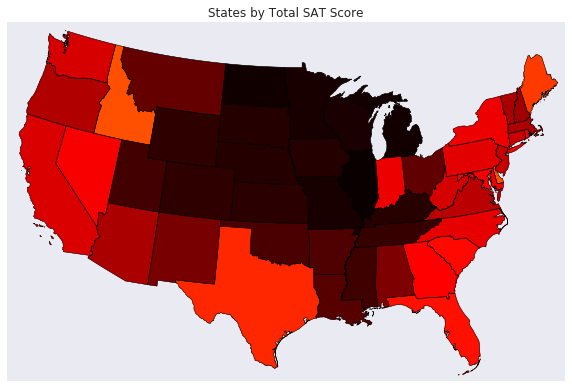

In [135]:
plt.figure(figsize=(10,10))

gen_plot_map(diccionarioTotal, 'States by Total SAT Score')

plt.show()

### 13. Imprimí el máximo y el mínimo de cada columna

In [136]:
print('Max')
print(np.max(satScore,axis=0))
print('')
print('Min')
print(np.min(satScore,axis=0))

#Aca el max y min State es por orden alfabético (string), no coincide necesariamente con 
#los valores numericos max y min respectivos

Max
State              Wyoming
Mathematics            616
Writing                842
Total SAT score       1802
dtype: object

Min
State              Alabama
Mathematics            388
Writing                412
Total SAT score       1214
dtype: object


In [137]:
#El valor máximo de writing excede el valor máximo posible para el SAT score en una disciplina
#Conseguimos el dataset completo en internet (https://www.qsleap.com/articles/average-sat-scores-by-state-us/), 
#con ese valor de writing correcto, el valor "." correcto también y la columna de "Critical Reading" que puede agregar 
#valor al análisis
#Procedemos a cargar ese dataset para los análisis

In [138]:
satScore = pd.read_csv('SATscore2015_correcto.csv')
satScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
State               53 non-null object
Critical Reading    53 non-null int64
Mathematics         53 non-null int64
Writing             53 non-null int64
Total SAT score     53 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


### 14. Escribí una función que use solo lists comprehensions (no for loops) para calcular el Desvío Estándar. Imprimí el Desvío Estándar de cada columna numérica.

In [139]:
def desvio_estandar(lista):
    media = np.mean(lista)
    sum_aux = [(x-media)**2 for x in lista]
    return np.sqrt(sum(sum_aux)/len(lista)).round(decimals=2)

print("Media de Math: \t \t \t {}".format(np.mean(satScore['Mathematics'].values).round(decimals=2)))
print("Mediana de Math: \t \t {}".format(np.median(satScore['Mathematics'].values).round(decimals=2)))
print("Moda de Math: \t \t \t {}".format(stats.mode(satScore['Mathematics'].values).mode))
print("Desvio estandar de Math: \t {}".format(float(desvio_estandar(satScore['Mathematics'].values)),2))
print("\n----------------------------------------\n")
print("Media de Writing: \t \t {}".format(np.mean(satScore['Writing'].values).round(decimals=2)))
print("Mediana de Writing: \t \t {}".format(np.median(satScore['Writing'].values).round(decimals=2)))
print("Moda de Writing: \t \t {}".format(stats.mode(satScore['Writing'].values).mode))
print("Desvio estandar de Writing: \t {}".format(float(desvio_estandar(list(satScore['Writing'].values))),2))
print("\n----------------------------------------\n")
print("Media de Reading: \t \t {}".format(np.mean(satScore['Critical Reading'].values).round(decimals=2)))
print("Mediana de Reading: \t \t {}".format(np.median(satScore['Critical Reading'].values).round(decimals=2)))
print("Moda de Reading: \t \t {}".format(stats.mode(satScore['Critical Reading'].values).mode))
print("Desvio estandar de Reading: \t {}".format(float(desvio_estandar(list(satScore['Critical Reading'].values))),2))
print("\n----------------------------------------\n")
print("Media de Total: \t \t {}".format(np.mean(satScore['Total SAT score'].values).round(decimals=2)))
print("Mediana de Total: \t \t {}".format(np.median(satScore['Total SAT score'].values).round(decimals=2)))
print("Moda de Total: \t \t {}".format(stats.mode(satScore['Total SAT score'].values).mode))
print("Desvio estandar de Total: \t {}".format(float(desvio_estandar(list(satScore['Total SAT score'].values))),2))

Media de Math: 	 	 	 531.96
Mediana de Math: 	 	 524.0
Moda de Math: 	 	 	 [494]
Desvio estandar de Math: 	 51.4

----------------------------------------

Media de Writing: 	 	 514.15
Mediana de Writing: 	 	 504.0
Moda de Writing: 	 	 [478]
Desvio estandar de Writing: 	 47.72

----------------------------------------

Media de Reading: 	 	 530.08
Mediana de Reading: 	 	 523.0
Moda de Reading: 	 	 [523]
Desvio estandar de Reading: 	 48.92

----------------------------------------

Media de Total: 	 	 1576.19
Mediana de Total: 	 	 1552.0
Moda de Total: 	 	 [1472]
Desvio estandar de Total: 	 147.3


## Paso 4. Visualizar los datos

### 15. Usando MatPlotLib y PyPlot, graficá la distribución del Rate. ¿Qué tipo de gráfico le correspondería? ¿Por qué?

In [140]:
mathScore = satScore['Mathematics'].values
writingScore = satScore['Writing'].values
readingScore = satScore['Critical Reading'].values
totalScore = satScore['Total SAT score'].values

### 16. Graficá la distribución de la variable *Math*

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


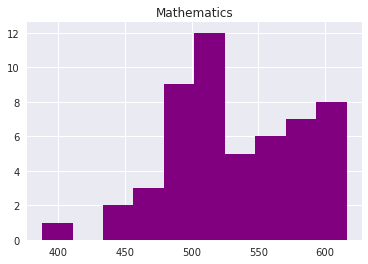

In [141]:
plt.hist(mathScore, color = 'purple' , bins=10)
plt.title('Mathematics')
plt.show()

### 17. Graficá la distribución de la variable *Writing*

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


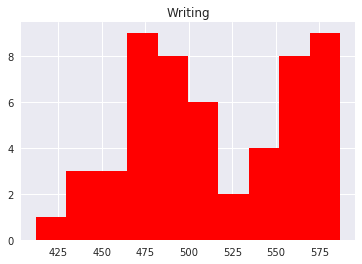

In [142]:
plt.hist(writingScore, color = 'r', bins = 10)
plt.title('Writing')
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


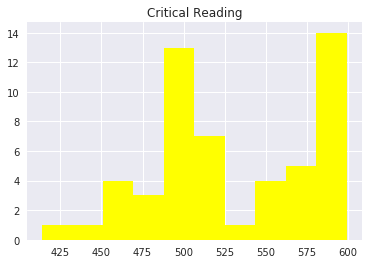

In [143]:
#Variable reading
plt.hist(readingScore, color = 'yellow', bins = 10)
plt.title('Critical Reading')
plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


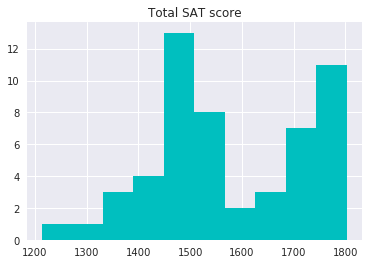

In [144]:
#Variable Total SAT score
plt.hist(totalScore, color = 'c', bins = 10)
plt.title('Total SAT score')
plt.show()

### 18. ¿Cuál sería un supuesto acerca de la distribución que genera los datos?

In [145]:
#Normal, por el tipo de datos

### 19. ¿Qué podrías decir de ese supuesto en relación a los datos analizados?

In [146]:
#Graficamente no se asemeja demasiado a una normal
#Las medias las medianas y las modas no difieren demasiado, por lo cual se podría decir que no hay asimetría, y podría ser normal


In [147]:
satScore.sort_values(['Total SAT score'], ascending=False).head()

,State,Critical Reading,Mathematics,Writing,Total SAT score
13,Illinois,599,616,587,1802
34,North Dakota,597,608,586,1791
22,Michigan,594,609,585,1788
23,Minnesota,595,607,576,1778
25,Missouri,596,599,582,1777


In [148]:
#El estado con mayor SAT score es Illinois, si la idea era ubicar la universidad según el estado 
#con mayor score, debería ser en ese.

## BONUS: Complementá el análisis

### 20. Elegí fuentes de datos adicionales (pobreza, ingresos, población, migrantes, etc.). Analiza y grafica los datos de forma conjunta para observar posibles relaciones. 
#### Pista: chequear consignas para ir a los links con datos

In [149]:
#Conseguimos datasets de GDP, GINI, Population and Density, Immigrants, Household income mediano, Schools para cada estado.
gdp = pd.read_csv('gdp2016.csv')
gini = pd.read_csv('gini2015.csv')
popAndDesity = pd.read_csv('population_and_density.csv')
immigrants = pd.read_csv('immigrants.csv')
householdIncome = pd.read_csv('median_household_income.csv')
schools = pd.read_csv('number_of_schools.csv')

In [150]:
#Left Join de todas los dataframes neuvos con el dataframe de los SAT scores
satAnalysis = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(satScore,gdp,on='State', how='left'), 
                                gini,on='State', how='left'),popAndDesity, on='State', how='left'),
                                immigrants,on='State', how='left'), householdIncome,on='State', how='left'),
                                schools,on='State', how='left')
satAnalysis.head()

,State,Critical Reading,Mathematics,Writing,Total SAT score,GDP2016,Gini,Density,Population,Immigrants,Household_Income,Number_of_Schools
0,Alabama,545,538,533,1616,204861.0,0.476,37.0,4858979.0,167000.0,44765.0,1386.0
1,Alaska,509,503,482,1494,50713.0,0.418,0.0,738432.0,54000.0,73355.0,497.0
2,Arizona,523,527,502,1552,302952.0,0.468,23.0,6828065.0,896000.0,51492.0,1976.0
3,Arkansas,568,569,551,1688,120689.0,0.471,22.0,2978204.0,139000.0,41995.0,1130.0
4,California,495,506,491,1492,2602672.0,0.489,97.0,39144818.0,10390000.0,64500.0,9373.0


In [151]:
#Vemos que columnas tiene NaN
nans = lambda df: df[df.isnull().any(axis=1)]
nans(satAnalysis)

,State,Critical Reading,Mathematics,Writing,Total SAT score,GDP2016,Gini,Density,Population,Immigrants,Household_Income,Number_of_Schools
8,District of Columbia,441,440,432,1313,126815.0,NaN,4247.0,672228.0,92000.0,75628.0,214.0
13,Illinois,599,616,587,1802,791608.0,0.477,89.0,12859995.0,1804000.0,59588.0,NaN
39,Puerto Rico,463,450,450,1363,NaN,NaN,NaN,NaN,NaN,18626.0,1513.0
48,Virgin Islands,414,388,412,1214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
#Removemos Puerto Rico y Virgin Islands para el análisis ya que tienen muchos NaN
#y tampoco son estados tan significativos en población
satAnalysis = satAnalysis.drop(satAnalysis.index[[39,48]])
nans = lambda df: df[df.isnull().any(axis=1)]
nans(satAnalysis)

,State,Critical Reading,Mathematics,Writing,Total SAT score,GDP2016,Gini,Density,Population,Immigrants,Household_Income,Number_of_Schools
8,District of Columbia,441,440,432,1313,126815.0,NaN,4247.0,672228.0,92000.0,75628.0,214.0
13,Illinois,599,616,587,1802,791608.0,0.477,89.0,12859995.0,1804000.0,59588.0,NaN


In [153]:
#Completamos los valores de Gini y Numer_of_Schools con la mediana
satAnalysis['Gini'] = satAnalysis['Gini'].fillna(satAnalysis['Gini'].median())
satAnalysis['Number_of_Schools'] = satAnalysis['Number_of_Schools'].fillna(satAnalysis['Number_of_Schools'].median())
nans = lambda df: df[df.isnull().any(axis=1)]
nans(satAnalysis)

,State,Critical Reading,Mathematics,Writing,Total SAT score,GDP2016,Gini,Density,Population,Immigrants,Household_Income,Number_of_Schools


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


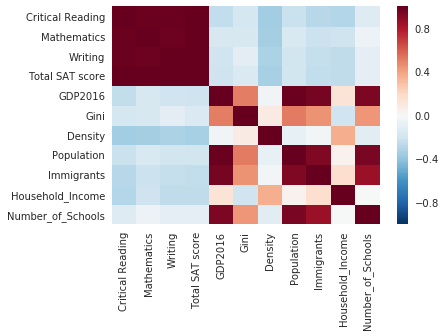

In [154]:
#Graficamos un heatmap de correlación
corr = satAnalysis.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [155]:
#Matriz de correlación numérica
satAnalysis.corr(method='pearson', min_periods=1)

,Critical Reading,Mathematics,Writing,Total SAT score,GDP2016,Gini,Density,Population,Immigrants,Household_Income,Number_of_Schools
Critical Reading,1.000000,0.984394,0.990160,0.996193,-0.244616,-0.176579,-0.345293,-0.226100,-0.279313,-0.293704,-0.128725
Mathematics,0.984394,1.000000,0.983106,0.993943,-0.170218,-0.165166,-0.341658,-0.160299,-0.218187,-0.206813,-0.057631
Writing,0.990160,0.983106,1.000000,0.995716,-0.200416,-0.104052,-0.312910,-0.187735,-0.236374,-0.253641,-0.094412
Total SAT score,0.996193,0.993943,0.995716,1.000000,-0.205895,-0.149572,-0.334995,-0.192139,-0.245682,-0.252338,-0.093843
GDP2016,-0.244616,-0.170218,-0.200416,-0.205895,1.000000,0.513947,-0.036536,0.984502,0.956051,0.135763,0.939392
Gini,-0.176579,-0.165166,-0.104052,-0.149572,0.513947,1.000000,0.079579,0.516584,0.451137,-0.196921,0.445000
Density,-0.345293,-0.341658,-0.312910,-0.334995,-0.036536,0.079579,1.000000,-0.080800,-0.026090,0.361355,-0.109650
Population,-0.226100,-0.160299,-0.187735,-0.192139,0.984502,0.516584,-0.080800,1.000000,0.932635,0.039546,0.952589
Immigrants,-0.279313,-0.218187,-0.236374,-0.245682,0.956051,0.451137,-0.026090,0.932635,1.000000,0.165164,0.864840
Household_Income,-0.293704,-0.206813,-0.253641,-0.252338,0.135763,-0.196921,0.361355,0.039546,0.165164,1.000000,-0.000707


In [156]:
#Se ve una correlación negativa pequeña entre Density y los scores, también Immigrants y Household income con los scores
#Creamos nuevas variables y eliminamos las no tan relevantes para hacer un análisis más detallado

In [157]:
satAnalysis['GDP_per_capita'] = satAnalysis['GDP2016']/satAnalysis['Population']
satAnalysis['Immigrants_percentage'] = satAnalysis['Immigrants']/satAnalysis['Population']
satAnalysis['Schools_per_capita'] = satAnalysis['Number_of_Schools']/satAnalysis['Population']

satAnalysis = satAnalysis.drop(satAnalysis.columns[[5,6,8,9,11]], axis=1)
satAnalysis.head()

,State,Critical Reading,Mathematics,Writing,Total SAT score,Density,Household_Income,GDP_per_capita,Immigrants_percentage,Schools_per_capita
0,Alabama,545,538,533,1616,37.0,44765.0,0.042161,0.034369,0.000285
1,Alaska,509,503,482,1494,0.0,73355.0,0.068677,0.073128,0.000673
2,Arizona,523,527,502,1552,23.0,51492.0,0.044369,0.131223,0.000289
3,Arkansas,568,569,551,1688,22.0,41995.0,0.040524,0.046672,0.000379
4,California,495,506,491,1492,97.0,64500.0,0.066488,0.265425,0.000239


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


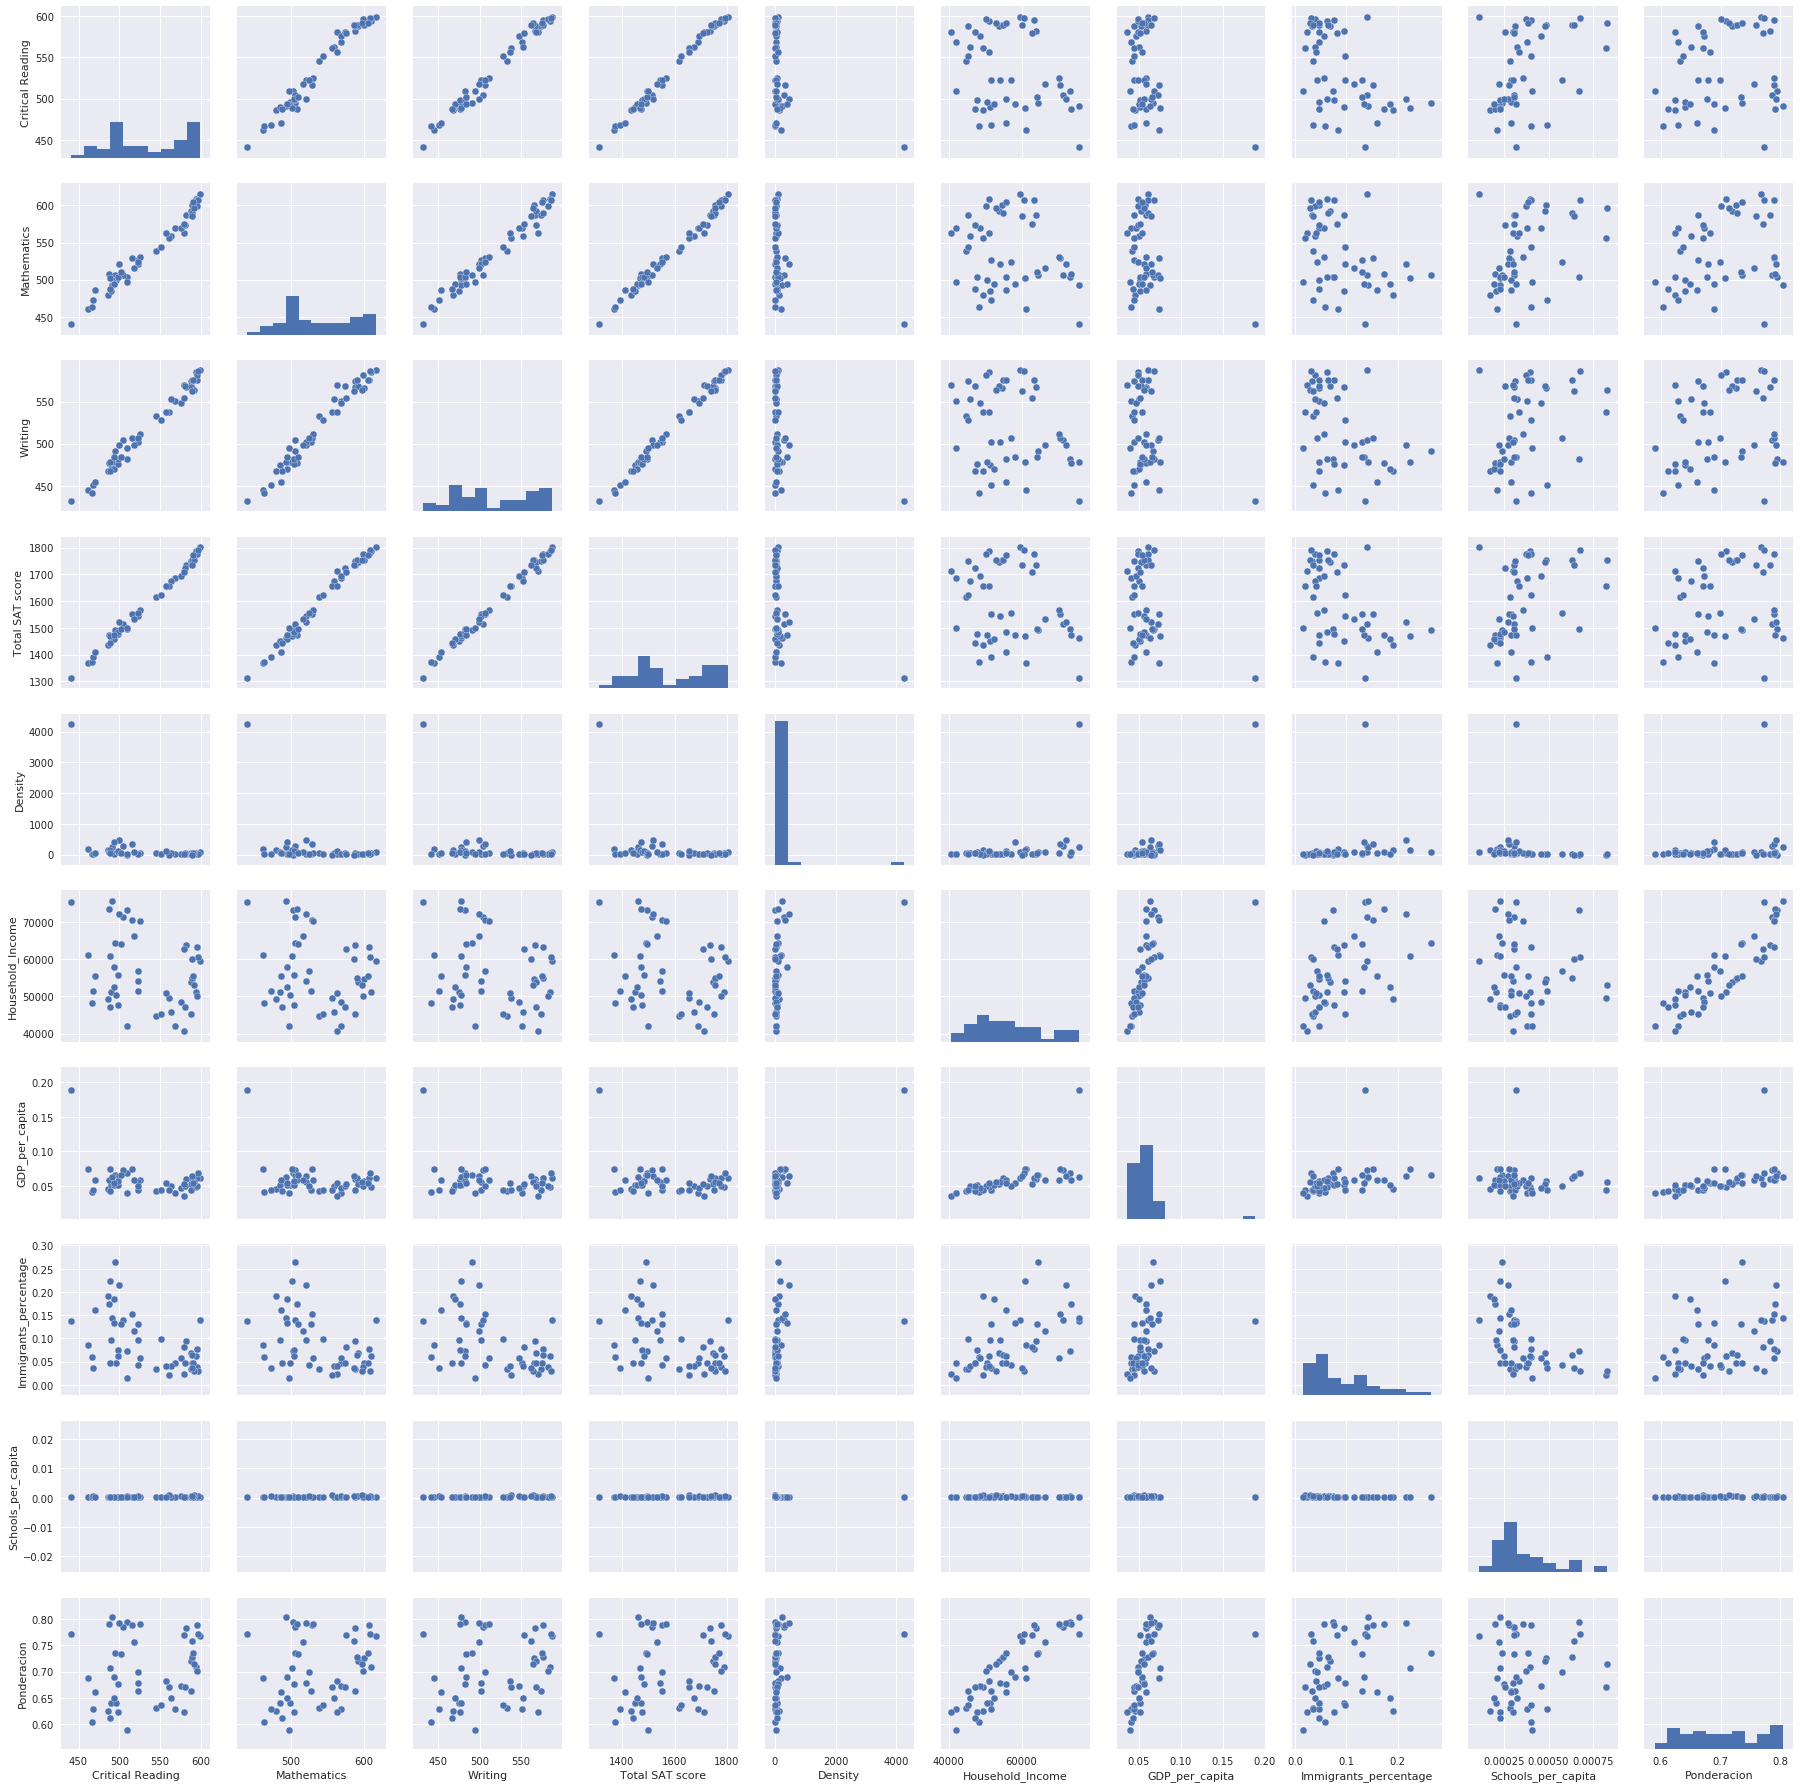

In [169]:
#Graficamos scatter plots para todas las variables
sns.pairplot(satAnalysis)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


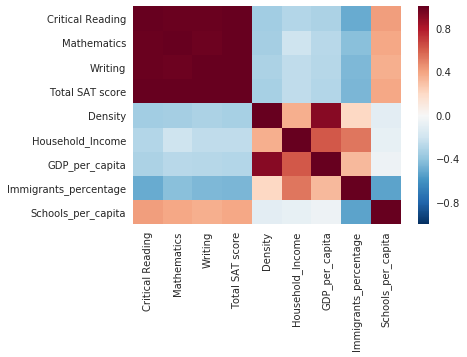

In [159]:
#Heatmap de correlación
corr = satAnalysis.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [160]:
#Matriz de correlación numérica
satAnalysis.corr(method='pearson', min_periods=1)

,Critical Reading,Mathematics,Writing,Total SAT score,Density,Household_Income,GDP_per_capita,Immigrants_percentage,Schools_per_capita
Critical Reading,1.000000,0.984394,0.990160,0.996193,-0.345293,-0.293704,-0.316864,-0.502143,0.414491
Mathematics,0.984394,1.000000,0.983106,0.993943,-0.341658,-0.206813,-0.279139,-0.417157,0.384461
Writing,0.990160,0.983106,1.000000,0.995716,-0.312910,-0.253641,-0.281643,-0.451554,0.365141
Total SAT score,0.996193,0.993943,0.995716,1.000000,-0.334995,-0.252338,-0.293912,-0.458936,0.389947
Density,-0.345293,-0.341658,-0.312910,-0.334995,1.000000,0.361355,0.908142,0.204355,-0.103187
Household_Income,-0.293704,-0.206813,-0.253641,-0.252338,0.361355,1.000000,0.617876,0.531790,-0.079858
GDP_per_capita,-0.316864,-0.279139,-0.281643,-0.293912,0.908142,0.617876,1.000000,0.327593,-0.049307
Immigrants_percentage,-0.502143,-0.417157,-0.451554,-0.458936,0.204355,0.531790,0.327593,1.000000,-0.533533
Schools_per_capita,0.414491,0.384461,0.365141,0.389947,-0.103187,-0.079858,-0.049307,-0.533533,1.000000


### 21. A partir de las variables seleccionados, ¿observas una mayor incidencia de alguna de las variables y la performance del estado en alguno de los scores? ¿Consideras importante inferir alguna conclusión para orientar a los directivos de la universidad y/o profundizar el análisis?  

In [161]:
#Density y Scores - correlación lineal negativa baja/media
#Household income y Scores - correlación lineal negativa baja
#GDP per capita y Scores - correlación lineal negativa baja/media
#Immigrants percentage y Scores - correlación lineal negativa media, un poco más alta
# en Reading y Writing como sugerían algunos, aunque en Math también se ve algo de correlación (interesante para analizar)
#Schools per capita y Scores - correlación lineal positiva media (interesante para analizar)

### 22. Graficá algunos scatterplots. Usá algún gráfico de Seaborn para presentar scatterplots múltiples

In [162]:
#arriba

### 23. ¿Hay alguna relación interesante para mencionar? ¿Cuál? ¿Qué tipo de relación es?

In [163]:
#Density y Scores - correlación lineal negativa baja/media
#Household income y Scores - correlación lineal negativa baja
#GDP per capita y Scores - correlación lineal negativa baja/media
#Immigrants percentage y Scores - correlación lineal negativa media, un poco más alta
# en Reading y Writing como sugerían algunos, aunque en Math también se ve algo de correlación (interesante para analizar)
#Schools per capita y Scores - correlación lineal positiva media (interesante para analizar)

## Propuesta para la ubicación de una nueva sede

In [166]:
#Creamos una nueva variable "Ponderacion" para evaluar en qué estado conviene ubicar la nueva sede
#La idea es encontrar la mejor combinación entre Total Score y household income (ingreso familiar mediano)
#Realizamos tres propuestas con distintas ponderaciones

#Propuesta 1 . 50% Score + 50% Ingreso
satAnalysis['Ponderacion'] = (satAnalysis['Total SAT score']/2400)*0.5 + (satAnalysis['Household_Income']/satAnalysis['Household_Income'].max())*0.5
satAnalysis.sort_values('Ponderacion' , ascending=False).head()

,State,Critical Reading,Mathematics,Writing,Total SAT score,Density,Household_Income,GDP_per_capita,Immigrants_percentage,Schools_per_capita,Ponderacion
20,Maryland,491,493,478,1462,238.0,75847.0,0.062979,0.142848,0.000228,0.804583
1,Alaska,509,503,482,1494,0.0,73355.0,0.068677,0.073128,0.000673,0.794822
30,New Jersey,500,521,499,1520,470.0,72222.0,0.064872,0.215338,0.000272,0.792770
11,Hawaii,487,508,477,1472,86.0,73486.0,0.058618,0.173931,0.000199,0.791102
29,New Hampshire,525,530,511,1566,57.0,70303.0,0.058511,0.057117,0.000358,0.789703


In [165]:
#Propuesta 2 . 75% Score + 25% Ingreso
satAnalysis['Ponderacion'] = (satAnalysis['Total SAT score']/2400)*0.75 + (satAnalysis['Household_Income']/satAnalysis['Household_Income'].max())*0.25
satAnalysis.sort_values('Ponderacion' , ascending=False).head()

,State,Critical Reading,Mathematics,Writing,Total SAT score,Density,Household_Income,GDP_per_capita,Immigrants_percentage,Schools_per_capita,Ponderacion
23,Minnesota,595,607,576,1778,26.0,63488.0,0.061051,0.076326,0.000403,0.764888
13,Illinois,599,616,587,1802,89.0,59588.0,0.061556,0.140280,0.000107,0.759534
34,North Dakota,597,608,586,1791,4.0,60557.0,0.068816,0.030386,0.000675,0.759290
5,Colorado,582,587,567,1736,20.0,63909.0,0.059321,0.094565,0.000308,0.753151
52,Wyoming,589,586,562,1737,2.0,60214.0,0.064592,0.035830,0.000642,0.741284


In [94]:
#Propuesta 3 . 25% Score + 75% Ingreso
satAnalysis['Ponderacion'] = (satAnalysis['Total SAT score']/2400)*0.25 + (satAnalysis['Household_Income']/satAnalysis['Household_Income'].max())*0.75
satAnalysis.sort_values('Ponderacion' , ascending=False).head()

,State,Critical Reading,Mathematics,Writing,Total SAT score,Density,Household_Income,GDP_per_capita,Immigrants_percentage,Schools_per_capita,Ponderacion
20,Maryland,491,493,478,1462,238.0,75847.0,0.062979,0.142848,0.000228,0.902292
8,District of Columbia,441,440,432,1313,4247.0,75628.0,0.188649,0.136858,0.000318,0.884605
1,Alaska,509,503,482,1494,0.0,73355.0,0.068677,0.073128,0.000673,0.880983
11,Hawaii,487,508,477,1472,86.0,73486.0,0.058618,0.173931,0.000199,0.879987
30,New Jersey,500,521,499,1520,470.0,72222.0,0.064872,0.215338,0.000272,0.872488


In [167]:
#Se realizaron tres análisis ponderando de tres formas estos valores, obteniendo los siguientes resultados:
#25% del Score y 75% del  Household Income:		Maryland
#50% del Score y 50% del  Household Income:		Maryland
#75% del Score y 25% del  Household Income:		Minnesota

### 24. Creá boxplots para cada variable (según corresponda)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


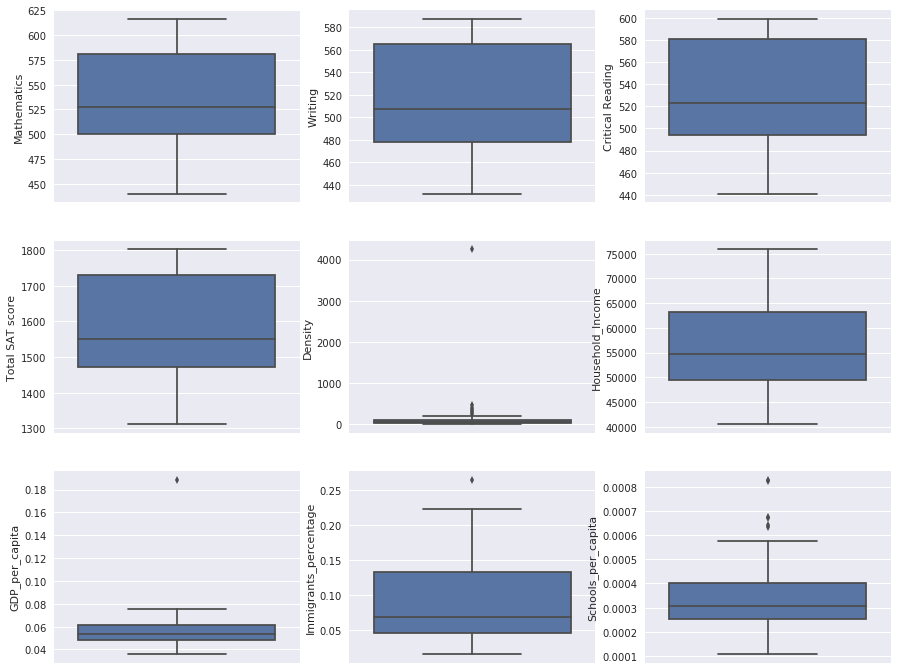

In [168]:

plt.figure(figsize=(15,12))


plt.subplot(3,3,1)
sns.boxplot(satAnalysis['Mathematics'], vert=True)

plt.subplot(3,3,2)
sns.boxplot(satAnalysis['Writing'], vert=True)

plt.subplot(3,3,3)
sns.boxplot(satAnalysis['Critical Reading'], vert=True)

plt.subplot(3,3,4)
sns.boxplot(satAnalysis['Total SAT score'], vert=True)

plt.subplot(3,3,5)
sns.boxplot(satAnalysis['Density'], vert=True)

plt.subplot(3,3,6)
sns.boxplot(satAnalysis['Household_Income'], vert=True)

plt.subplot(3,3,7)
sns.boxplot(satAnalysis['GDP_per_capita'], vert=True)

plt.subplot(3,3,8)
sns.boxplot(satAnalysis['Immigrants_percentage'], vert=True)

plt.subplot(3,3,9)
sns.boxplot(satAnalysis['Schools_per_capita'], vert=True)

In [ ]:
#Link al blog: https://docs.google.com/document/d/1E3zinOhDEfd_zA7nMLFTdg24lxeZCnRtb5pz9uBU_60/edit?usp=sharing